<a href="https://colab.research.google.com/github/Dethkalleon/AILabs/blob/main/AI3_V2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3

ФИО: Солдаткин Андрей Алексеевич

Группа: БИВТ-22-СП-4

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`)
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

# Подключение Гугл Диска


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Подключение библиотек и считывание CSV

In [ ]:
# Импортирование библиотек
import pandas as pd # Пандасик, вкусные таблички
import numpy as np # Работа с наборами данных
import matplotlib.pyplot as plt # Графики для сравнения
import seaborn as sns # Стат данные визуализировать
from sklearn.model_selection import train_test_split # Разделение на тестовую и обучающие выборки
from sklearn.preprocessing import StandardScaler # Нормализация данных
from sklearn.impute import SimpleImputer # Заполняем пропуски
from sklearn.compose import ColumnTransformer # Преобразование категориальных данных
from sklearn.pipeline import Pipeline # Упрощение работы с данными: т.е. предобработка, обучение и прогнозирование в одном флаконе
#Библиотеки для работы с задачей регрессии
from sklearn.linear_model import LinearRegression # Линейная регрессия
from sklearn.tree import DecisionTreeRegressor # Деревье решений
from sklearn.neighbors import KNeighborsRegressor # k-ближайших соседей
from sklearn.ensemble import RandomForestRegressor # Случайный лес
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # Оценка качества модели

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/MSAD/Salary_Data.csv')

# Замена значений в столбце 'Education Level' для корректности
data['Education Level'] = data['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})

# Проверка на пропуски
print("Пропущенные значения в данных:")
print(data.isnull().sum())

Пропущенные значения в данных:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


#Просто проверка на тип задачи

In [ ]:
# Проверка структуры данных и целевого признака
print(data.describe())
data['Salary'].unique()

if data['Salary'].dtype in ['int64', 'float64']:
    print("Это задача регрессии.")
else:
    print("Это задача классификации.")

               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000
Это задача регрессии.


#Заполнение пропусков

In [ ]:
# Заполнение пропусков
data.fillna({
    "Age": np.mean(data['Age']),  # Заполнение пропусков в 'Age' средним значением
    "Gender": data['Gender'].mode().values[0],  # Заполнение пропусков в 'Gender' наиболее частым значением
    "Education Level": data['Education Level'].mode().values[0],  # Заполнение пропусков в 'Education Level' наиболее частым значением
    "Job Title": data['Job Title'].mode().values[0],  # Заполнение пропусков в 'Job Title' наиболее частым значением
    "Years of Experience": np.mean(data['Years of Experience']),  # Заполнение пропусков в 'Years of Experience' средним значением
}, inplace=True)

data_clean = data.dropna(subset=['Salary'])

# Проверка на наличие пропусков после замены
print("Пропущенные значения после заполнения:")
print(data_clean.isnull().sum())


Пропущенные значения после заполнения:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


#Разделение на признаки и целевую

In [ ]:
X = data_clean.drop(columns=['Salary'])
Y = data_clean['Salary']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Вывод размеров тренировочной и тестовой выборки
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Общее количество записей: {X.shape[0]}")

Размер тренировочной выборки: (5359, 5)
Размер тестовой выборки: (1340, 5)
Общее количество записей: 6699


#Предобработка данных: Разделение на train/test и обработка пропусков


In [ ]:
# Числовой пайплайн
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Масштабирование числовых данных
])
num_features = ['Age', 'Years of Experience']
cat_features = ['Gender', 'Education Level', 'Job Title']
# Категориальный пайплайн
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Кодирование категориальных данных
])

# Преобразователь данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),  # Преобразование числовых данных
        ('cat', cat_transformer, cat_features)   # Преобразование категориальных данных
    ]
)


16.12 Наверное OneHot не стоит делать. В четвертой нужно попробовать Label

#Обучение

In [ ]:
# Модели для обучения
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=150)
}

# Обучение моделей и оценка метрик
for model_name, model in models.items():
    # Применение преобразователя данных
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Обучение модели
    model.fit(X_train_processed, Y_train)

    # Прогнозы на тренировочной и тестовой выборках
    Y_train_pred = model.predict(X_train_processed)
    Y_test_pred = model.predict(X_test_processed)

    # Оценка модели
    print(f"Model: {model_name}")

    # Метрики для тренировочной выборки
    print(f"Train MAE: {mean_absolute_error(Y_train, Y_train_pred)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(Y_train, Y_train_pred))}")
    print(f"Train MAPE: {mean_absolute_percentage_error(Y_train, Y_train_pred)}")

    # Метрики для тестовой выборки
    print(f"Test MAE: {mean_absolute_error(Y_test, Y_test_pred)}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(Y_test, Y_test_pred))}")
    print(f"Test MAPE: {mean_absolute_percentage_error(Y_test, Y_test_pred)}")
    print('-' * 50)


Model: Linear Regression
Train MAE: 15168.925977602003
Train RMSE: 21022.59329637574
Train MAPE: 0.21363378925231802
Test MAE: 15386.697961862283
Test RMSE: 21080.99893072342
Test MAPE: 0.14595556305077392
--------------------------------------------------
Model: Decision Tree
Train MAE: 14400.539667912237
Train RMSE: 19900.8346195891
Train MAPE: 0.2372652727825202
Test MAE: 14959.787531660237
Test RMSE: 20703.536517146174
Test MAPE: 0.15042070849259084
--------------------------------------------------
Model: K-Nearest Neighbors
Train MAE: 3562.2281022578836
Train RMSE: 8551.265269935082
Train MAPE: 0.11669283312999278
Test MAE: 4553.639552238806
Test RMSE: 11095.693551137138
Test MAPE: 0.04571452044297681
--------------------------------------------------
Model: Random Forest
Train MAE: 1799.877401482137
Train RMSE: 4867.641670121929
Train MAPE: 0.07983983151842725
Test MAE: 3059.857972195859
Test RMSE: 7968.817757190127
Test MAPE: 0.029797629981493358
-------------------------------

#Оценка

In [ ]:
metrics = []
for model_name, model in models.items():
    Y_train_pred = model.predict(preprocessor.transform(X_train))
    Y_test_pred = model.predict(preprocessor.transform(X_test))

    metrics.append({
        'Model': model_name,
        'Train MAE': mean_absolute_error(Y_train, Y_train_pred),
        'Train RMSE': np.sqrt(mean_squared_error(Y_train, Y_train_pred)),
        'Train MAPE': mean_absolute_percentage_error(Y_train, Y_train_pred),
        'Test MAE': mean_absolute_error(Y_test, Y_test_pred),
        'Test RMSE': np.sqrt(mean_squared_error(Y_test, Y_test_pred)),
        'Test MAPE': mean_absolute_percentage_error(Y_test, Y_test_pred),
    })

metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Train MAE,Train RMSE,Train MAPE,Test MAE,Test RMSE,Test MAPE
0,Linear Regression,15168.925978,21022.593296,0.213634,15386.697962,21080.998931,0.145956
1,Decision Tree,14400.539668,19900.834620,0.237265,14959.787532,20703.536517,0.150421
2,K-Nearest Neighbors,3562.228102,8551.265270,0.116693,4553.639552,11095.693551,0.045715
3,Random Forest,1799.877401,4867.641670,0.079840,3059.857972,7968.817757,0.029798


#Графики

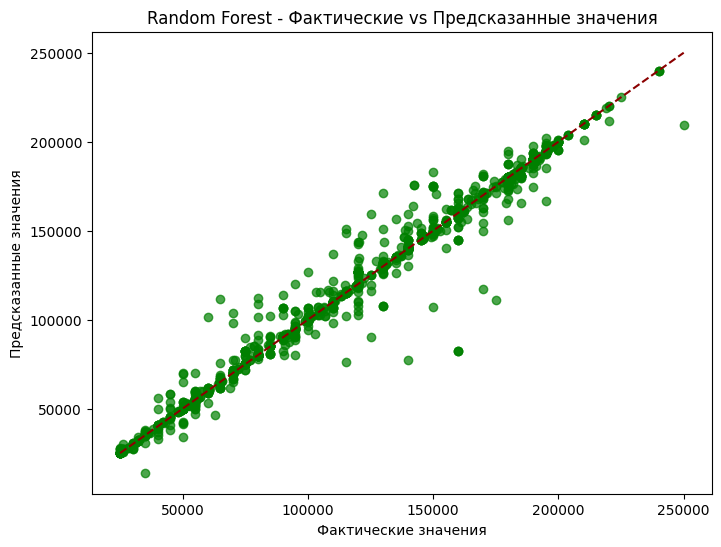

In [ ]:
# Получение предсказанных значений для тестовой выборки
best_model_name = 'Random Forest'
best_model = models[best_model_name]
Y_pred_test = best_model.predict(preprocessor.transform(X_test))

# График фактических значений против предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_test, alpha=0.7, color='green')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'{best_model_name} - Фактические vs Предсказанные значения')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='darkred', linestyle='--')  # Линия идеальных предсказаний
plt.show()

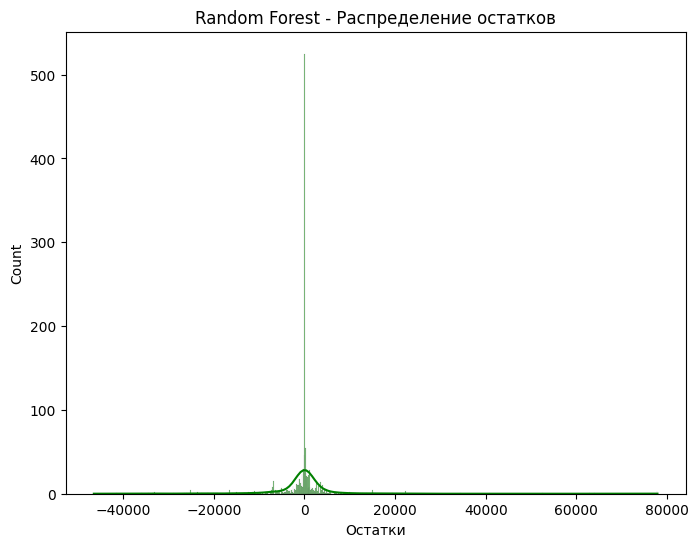

In [ ]:
# Остатки
residuals = Y_test - Y_pred_test

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Остатки')
plt.title(f'{best_model_name} - Распределение остатков')
plt.show()


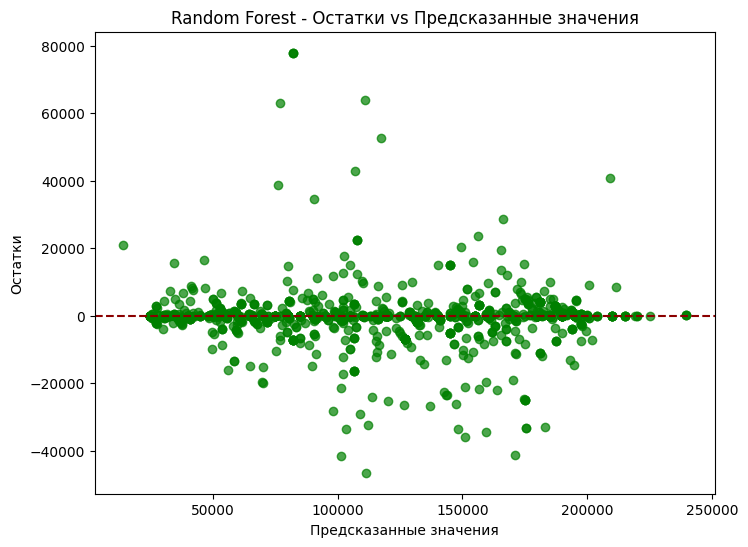

In [ ]:
# График остатков против предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred_test, residuals, alpha=0.7, color='green')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title(f'{best_model_name} - Остатки vs Предсказанные значения')
plt.axhline(y=0, color='darkred', linestyle='--')
plt.show()
